# Working with time series data Exercises

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

In [1]:
# pip install vega_datasets

You can use this library like so:

In [2]:
from vega_datasets import data
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## PT. 1

Call the sf_temps() dataset from the vega_datasets library like so:

data.sf_temps()

Use the above dataset for the following exercises:

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
temp = data.sf_temps()

In [4]:
temp.head(3)

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00


In [5]:
temp = temp.set_index('date')

In [6]:
temp.head(3)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9


In [7]:
day_avg = temp.resample('d').mean()

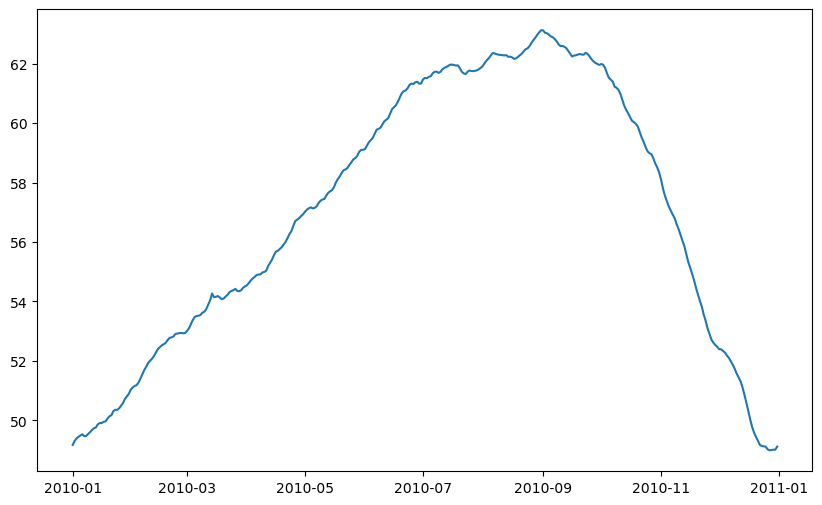

In [8]:
plt.figure(figsize=(10,6))
plt.plot(day_avg)

### 2. Write the code necessary to visualize the minimum temperature over time.

In [9]:
min_daily_temp = temp.resample('d').min()

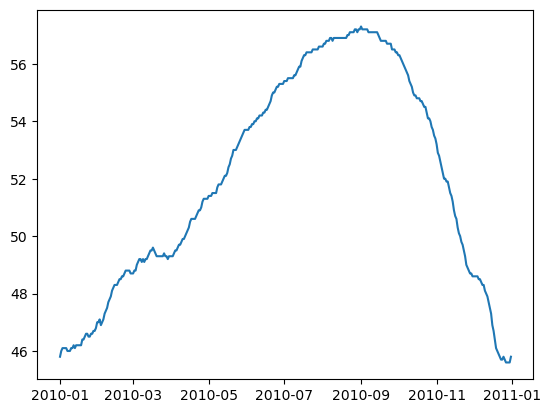

In [10]:
plt.plot(min_daily_temp)

### 3. Write the code necessary to visualize the maximum temperature over time.

In [11]:
max_daily_temp = temp.resample('d').max()

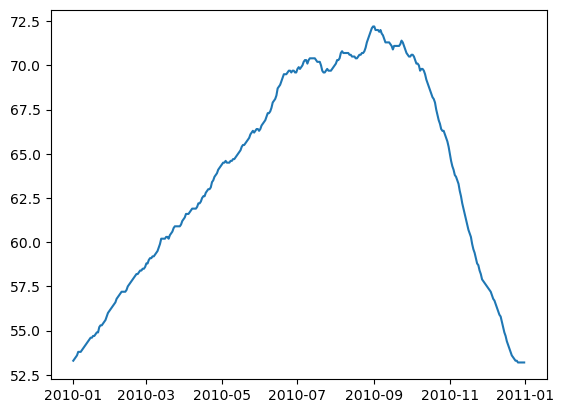

In [12]:
plt.plot(max_daily_temp)

### 4. Which month is the coldest, on average?

In [13]:
monthly_temp = temp.resample('m').mean()

In [178]:
monthly_temp.idxmin().dt.month_name()

temp    January
dtype: object

### 5. Which month has the highest average temperature?

In [15]:
monthly_temp.idxmax().dt.month_name()

temp    September
dtype: object

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [179]:
daily_temp = temp.resample('d')
daily_var = daily_temp.max() - daily_temp.min()

In [180]:
daily_temp_avg = daily_temp.mean()

In [181]:
daily_temp_avg['variance'] = daily_var

In [182]:
monthly_var = daily_temp_avg.resample('m').mean()

In [183]:
monthly_var.variance.idxmax().month_name()

'September'

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

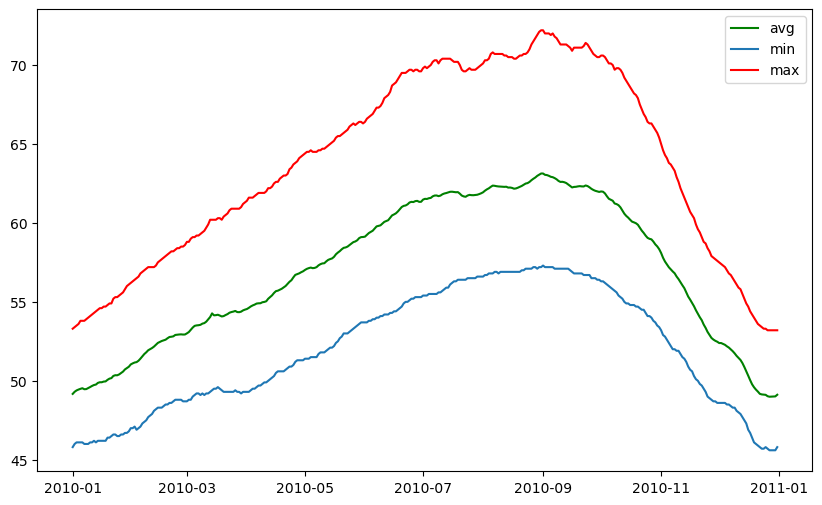

In [176]:
plt.figure(figsize=(10,6))
plt.plot(daily_temp.mean(), color='green', label='avg')
plt.plot(daily_temp.min(), label='min')
plt.plot(daily_temp.max(), color='red', label='max')
plt.legend()

## PT. 2

data.seattle_weather()

Use the above dataset for the following exercises:

### 1. Which year and month combination has the highest amount of precipitation?

In [36]:
w = data.seattle_weather()

In [40]:
w = w.set_index('date')

In [37]:
w.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [50]:
w.resample('m').precipitation.sum().idxmax().strftime('%b %y')

'Dec 15'

This date had the highest cumulative rainfall

In [184]:
monthly = w.resample('M')

### 2. Visualize the amount of monthly precipitation over time.

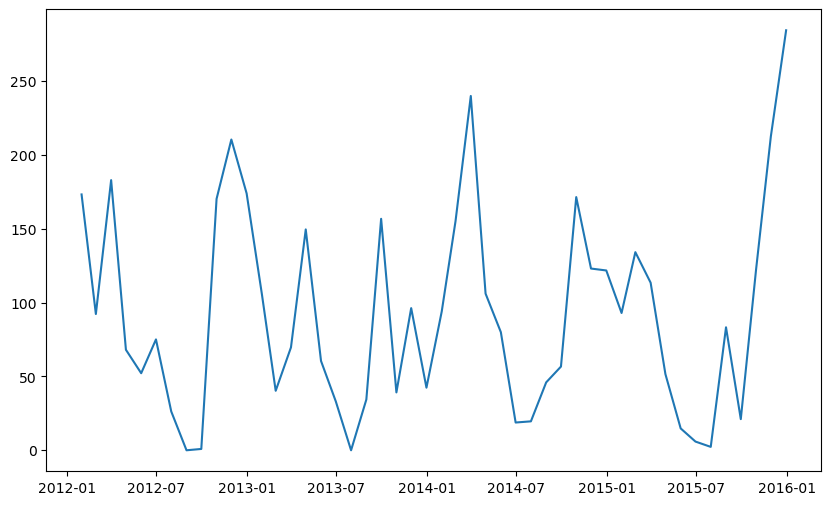

In [185]:
plt.figure(figsize=(10,6))
plt.plot(monthly.precipitation.sum())

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

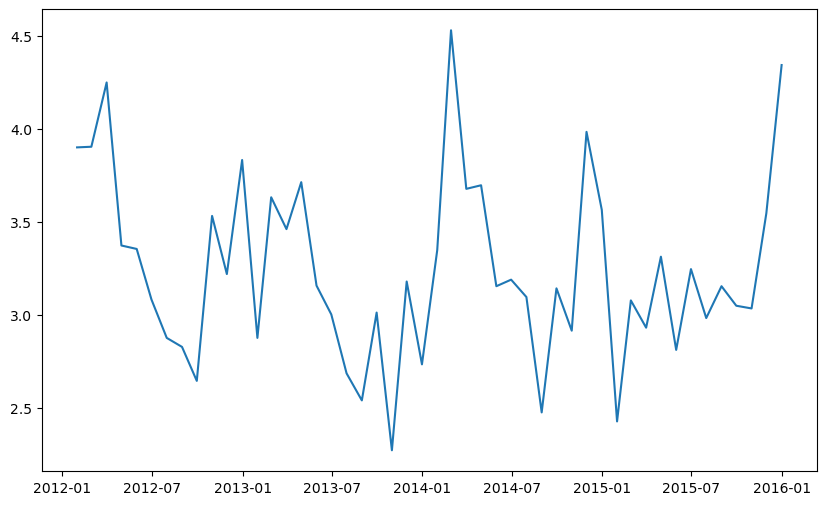

In [186]:
plt.figure(figsize=(10,6))
plt.plot(monthly.wind.mean())
plt.show()

### 4. Which year-month combination is the windiest?

In [60]:
w.resample('m').wind.mean().idxmax().strftime('%b %y')

'Feb 14'

This date had the highest average wind.

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [74]:
sunny = w.weather == 'sun'
sunny.resample('y').sum().idxmax().year

2014

### 6. In which month does it rain the most?

In [83]:
w.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date', length=1461)

In [93]:
rainy = w.weather == 'rain'
rain_sum = rainy.resample('m').sum()

In [95]:
rain_sum.index = rain_sum.index.month_name()

In [101]:
rain_sum.groupby('date').mean().idxmax()

'February'

In [ ]:
# February has the highest average cumulative rainfall

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [103]:
w_precip = w.precipitation > 0

In [107]:
w_precip.resample('m').sum().idxmax().strftime('%b %y')

'Dec 12'

## PT. 3

data.flights_20k()

Use the above dataset for the following exercises:

In [108]:
fly = data.flights_20k()

In [111]:
fly.head(10)

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
5,2001-03-14 14:55:00,3,405,MCI,MDW
6,2001-03-14 19:04:00,20,1999,BWI,PHX
7,2001-01-22 09:05:00,0,628,ABQ,SAN
8,2001-01-30 19:15:00,22,358,SMF,BUR
9,2001-01-27 07:00:00,-13,588,BNA,BWI


In [117]:
fly = fly.set_index('date')

In [119]:
fly = fly.sort_values('date')

In [132]:
len(fly)

20000

In [120]:
fly.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [152]:
fly.tail()

,delay,distance,origin,destination
date,,,,
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,0,318,FLL,JAX
2001-03-31 21:05:00,0,451,MCI,IND
2001-03-31 21:30:00,30,174,TPA,PBI
2001-03-31 21:30:00,0,495,BWI,SDF


### 1. Convert any negative delays to 0.

In [114]:
zero_delay = np.where(fly.delay < 0, 0, fly.delay)
zero_delay[:10]

array([32,  0,  3,  0,  0,  3, 20,  0, 22,  0])

In [115]:
fly.delay = zero_delay

### 2. Which hour of the day has the highest average delay?

In [124]:
hourly_delay = fly.delay.resample('h').mean()

In [129]:
hourly_delay.index = hourly_delay.index.hour

In [135]:
hourly_delay.groupby('date').mean().idxmax()

3

3 in the morning has the highest average delay

### 3. Does the day of the week make a difference in the delay amount?

In [144]:
fly_day = fly.copy()
fly_day.index = fly.index.day_name()

In [149]:
fly_day.groupby('date').delay.mean().sort_values()

date
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

Fridays have the longest delays on average

### 4. Does the month make a difference in the delay amount?

In [151]:
fly_mon = fly.copy()
fly_mon.index = fly.index.month_name()
fly_mon.groupby('date').delay.mean()

date
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

Hard to say if this result significant based from this. Jan and feb have slightly higher average delays but not by a lot.

In [170]:
import sys

sys.path.append('/Users/nickolaspedrimiranda/CodeUp/Regression-Project/')

from scipy import stats
import evaluate as ev

In [158]:
avg_monthly_delay = fly_mon.delay.mean()

In [173]:
feb = fly_mon[fly_mon.index == 'February']
jan = fly_mon[fly_mon.index == 'January']

In [164]:
feb

,delay,distance,origin,destination
date,,,,
February,0,371,OAK,SNA
February,0,337,OAK,LAX
February,0,287,GEG,BOI
February,0,453,TUL,HOU
February,0,229,MDW,DTW
...,...,...,...,...
February,152,313,OKC,MCI
February,34,197,TPA,FLL
February,112,677,LAX,ABQ


In [166]:
avg_monthly_delay.dtype

dtype('float64')

In [172]:
avg_monthly_delay

11.11945

In [168]:
t, p = stats.ttest_1samp(feb.delay, avg_monthly_delay)
t, p

(3.651570651457094, 0.0002627706578178998)

In [171]:
ev.check_ttest(t, p)

There is a signifcant result. P-value was 0.0.
T-value was greater than 0. With a value of 3.65.


In [174]:
t, p = stats.ttest_ind(feb.delay,jan.delay)
ev.check_ttest(t, p)

There is a signifcant result. P-value was 0.02.
T-value was greater than 0. With a value of 2.32.
